In [ ]:
#!pip install astropy
!pip install dblinea

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
from dblinea import DBBase

%reload_ext autoreload
%autoreload 2

In [14]:
#conexao a base de dados
db = DBBase()        
schema = "des_dr2"
tablename = "main"

In [ ]:
db.get_table_columns(tablename, schema=schema)

In [ ]:
db.describe_table(tablename, schema=schema)

In [ ]:
"""
SELECT coadd_object_id, ra ,dec, flags_g, mag_auto_g_dered, mag_auto_r_dered, 
        mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i 
FROM des_dr2.main 
WHERE q3c_poly_query(ra, dec, ARRAY[14.5, -34.2, 15.5, -34.2, 15.5, -33.2, 14.5, -33.2])
AND extended_class_coadd < 2
"""

In [15]:
query = "SELECT coadd_object_id, ra, dec FROM des_dr2.main limit 15"
lista_10_objetos = db.fetchall(query)
lista_10_objetos

[(1529220421, 76.914089, -46.937152),
 (1529220121, 76.918024, -46.934654),
 (1529220129, 76.914734, -46.934679),
 (1529220385, 76.912989, -46.936798),
 (1529220066, 76.911689, -46.934485),
 (1529220084, 76.923009, -46.934203),
 (1529220030, 76.923706, -46.933679),
 (1529219643, 76.925857, -46.930103),
 (1529219488, 76.928655, -46.928536),
 (1529219566, 76.923838, -46.929452),
 (1529219765, 76.914751, -46.931326),
 (1529219555, 76.917888, -46.929348),
 (1529219479, 76.916135, -46.928507),
 (1529220398, 76.909361, -46.936984),
 (1529220397, 76.907985, -46.937036)]

In [16]:
# 47 Tucanae
c = SkyCoord('00h24m05.359s', '−72d04m53.20s', frame='icrs')
c

<SkyCoord (ICRS): (ra, dec) in deg
    (6.02232917, -72.08144444)>

In [22]:
#NGC 1261
c = SkyCoord('03h12m16.21s', '−55d12m58.4s', frame='icrs')
c

<SkyCoord (ICRS): (ra, dec) in deg
    (48.06754167, -55.21622222)>

## Query Região Circular - NGC 1261

In [23]:
# Selecao de uma regiao circular de 1 deg em torno do aglomerado globular NGC1261
"""
SELECT coadd_object_id, ra ,dec, flags_g, mag_auto_g_dered, mag_auto_r_dered, 
        mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i, 
FROM des_dr2.main 
WHERE q3c_radial_query(ra, dec, 48.06754167, -55.21622222, 0.5)
AND extended_class_coadd < 2
"""

'\nSELECT coadd_object_id, ra ,dec, flags_g, mag_auto_g_dered, mag_auto_r_dered, \n        mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i, \nFROM des_dr2.main \nWHERE q3c_radial_query(ra, dec, 48.06754167, -55.21622222, 0.5)\nAND extended_class_coadd < 2\n'

In [24]:
query = "SELECT coadd_object_id, ra ,dec, flags_g, mag_auto_g_dered, mag_auto_r_dered, mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i FROM des_dr2.main WHERE q3c_radial_query(ra, dec, 48.06754167, -55.21622222, 0.5) AND extended_class_coadd < 2"
query

'SELECT coadd_object_id, ra ,dec, flags_g, mag_auto_g_dered, mag_auto_r_dered, mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i FROM des_dr2.main WHERE q3c_radial_query(ra, dec, 48.06754167, -55.21622222, 0.5) AND extended_class_coadd < 2'

In [25]:
%%time
dados_NGC1261 = db.fetchall_df(query)
dados_NGC1261

CPU times: user 240 ms, sys: 65.8 ms, total: 306 ms
Wall time: 1.47 s


coadd_object_id         ra        dec  flags_g  mag_auto_g_dered  \
0           1375829423  48.453048 -55.661009        0         23.482197   
1           1375829059  48.480226 -55.655995        2         24.976984   
2           1375828939  48.485094 -55.654701        0         24.111883   
3           1375828377  48.478675 -55.649696        0         25.422785   
4           1375827632  48.516404 -55.642199        0         26.027010   
...                ...        ...        ...      ...               ...   
27977       1376637712  47.813964 -54.745306        3         23.846054   
27978       1376637420  47.822088 -54.740455        0         25.320761   
27979       1376637744  47.807027 -54.744365        0         24.972128   
27980       1376637676  47.788358 -54.743529        0         27.306150   
27981       1376637276  47.821645 -54.738882        0         27.643435   

       mag_auto_r_dered  mag_auto_i_dered  magerr_auto_g  magerr_auto_r  \
0             22.085297         20.805164       0.081839       0.033383   
1             24.254601         24.344259       0.310792       0.212118   
2             23.398897         23.043949       0.102660       0.070784   
3             25.117588         25.806803       0.213430       0.210802   
4             26.606642         25.286421       0.480839       1.075242   
...                 ...               ...            ...            ...   
27977         22.555357         21.418091       0.132731       0.052306   
27978         25.340763         25.982252       0.191259       0.256510   
27979         24.586123         24.482925       0.283920       0.260297   
27980         24.789276         22.788115       2.223171       0.286870   
27981         27.236584         26.388065       1.636598       1.483908   

       magerr_auto_i  
0           0.016821  
1           0.450143  
2           0.099434  
3           0.727032  
4           0.583887  
...              ...  
27977       0.031296  
27978       0.782740  
27979       0.400550  
27980       0.078621  
27981       1.151429  

[27982 rows x 10 columns]

## Query Região Quadrada - NGC 1261

In [31]:
"""
SELECT coadd_object_id, ra ,dec, flags_g, mag_auto_g_dered, mag_auto_r_dered, 
        mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i 
FROM des_dr2.main 
WHERE q3c_poly_query(ra, dec, ARRAY[47.57, -55.72, 48.57, -55.72, 48.57, -54.72, 47.57, -54.72])
AND extended_class_coadd < 2
"""

'\nSELECT coadd_object_id, ra ,dec, flags_g, mag_auto_g_dered, mag_auto_r_dered, \n        mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i \nFROM des_dr2.main \nWHERE q3c_poly_query(ra, dec, ARRAY[47.57, -55.72, 48.57, -55.72, 48.57, -54.72, 47.57, -54.72])\nAND extended_class_coadd < 2\n'

In [32]:
query2 = "SELECT coadd_object_id, ra ,dec, flags_g, mag_auto_g_dered, mag_auto_r_dered, mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i FROM des_dr2.main WHERE q3c_poly_query(ra, dec, ARRAY[47.57, -55.72, 48.57, -55.72, 48.57, -54.72, 47.57, -54.72]) AND extended_class_coadd < 2"
query2

'SELECT coadd_object_id, ra ,dec, flags_g, mag_auto_g_dered, mag_auto_r_dered, mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i FROM des_dr2.main WHERE q3c_poly_query(ra, dec, ARRAY[47.57, -55.72, 48.57, -55.72, 48.57, -54.72, 47.57, -54.72]) AND extended_class_coadd < 2'

In [33]:
%%time
dados_NGC1261_sqr = db.fetchall_df(query2)
dados_NGC1261_sqr

CPU times: user 198 ms, sys: 28.3 ms, total: 226 ms
Wall time: 541 ms


coadd_object_id         ra        dec  flags_g  mag_auto_g_dered  \
0           1448113366  48.568500 -55.719951        0         26.211361   
1           1448113275  48.563884 -55.718917        0         25.318602   
2           1448113224  48.561593 -55.718507        0         25.960274   
3           1448113172  48.566208 -55.718013        0         25.230549   
4           1375835239  48.388186 -55.719507        3         25.633074   
...                ...        ...        ...      ...               ...   
22086       1376635707  47.631323 -54.722151        0         24.198868   
22087       1376635939  47.643189 -54.724704        3         99.000000   
22088       1376635825  47.617467 -54.723275        0         24.844349   
22089       1376635703  47.611623 -54.722166        0         24.163244   
22090       1376635628  47.606775 -54.721341        0         25.364586   

       mag_auto_r_dered  mag_auto_i_dered  magerr_auto_g  magerr_auto_r  \
0             24.992846         25.010235       0.404072       0.175734   
1             24.878296         25.962273       0.190102       0.177782   
2             26.580229         24.283226       0.401594       1.002338   
3             25.236544         24.561163       0.284445       0.382172   
4             24.679962         24.528418       0.322184       0.172406   
...                 ...               ...            ...            ...   
22086         24.325167         24.375336       0.194694       0.276900   
22087         24.818497         25.264000      99.000000       0.220221   
22088         24.259007         25.467211       0.258098       0.196594   
22089         23.538504         23.138121       0.133648       0.095379   
22090         24.873966         25.114069       0.185985       0.154643   

       magerr_auto_i  
0           0.318416  
1           0.817938  
2           0.204478  
3           0.366143  
4           0.267528  
...              ...  
22086       0.502917  
22087       0.575076  
22088       1.037379  
22089       0.114305  
22090       0.334328  

[22091 rows x 10 columns]

CPU times: user 258 ms, sys: 116 ms, total: 374 ms
Wall time: 352 ms


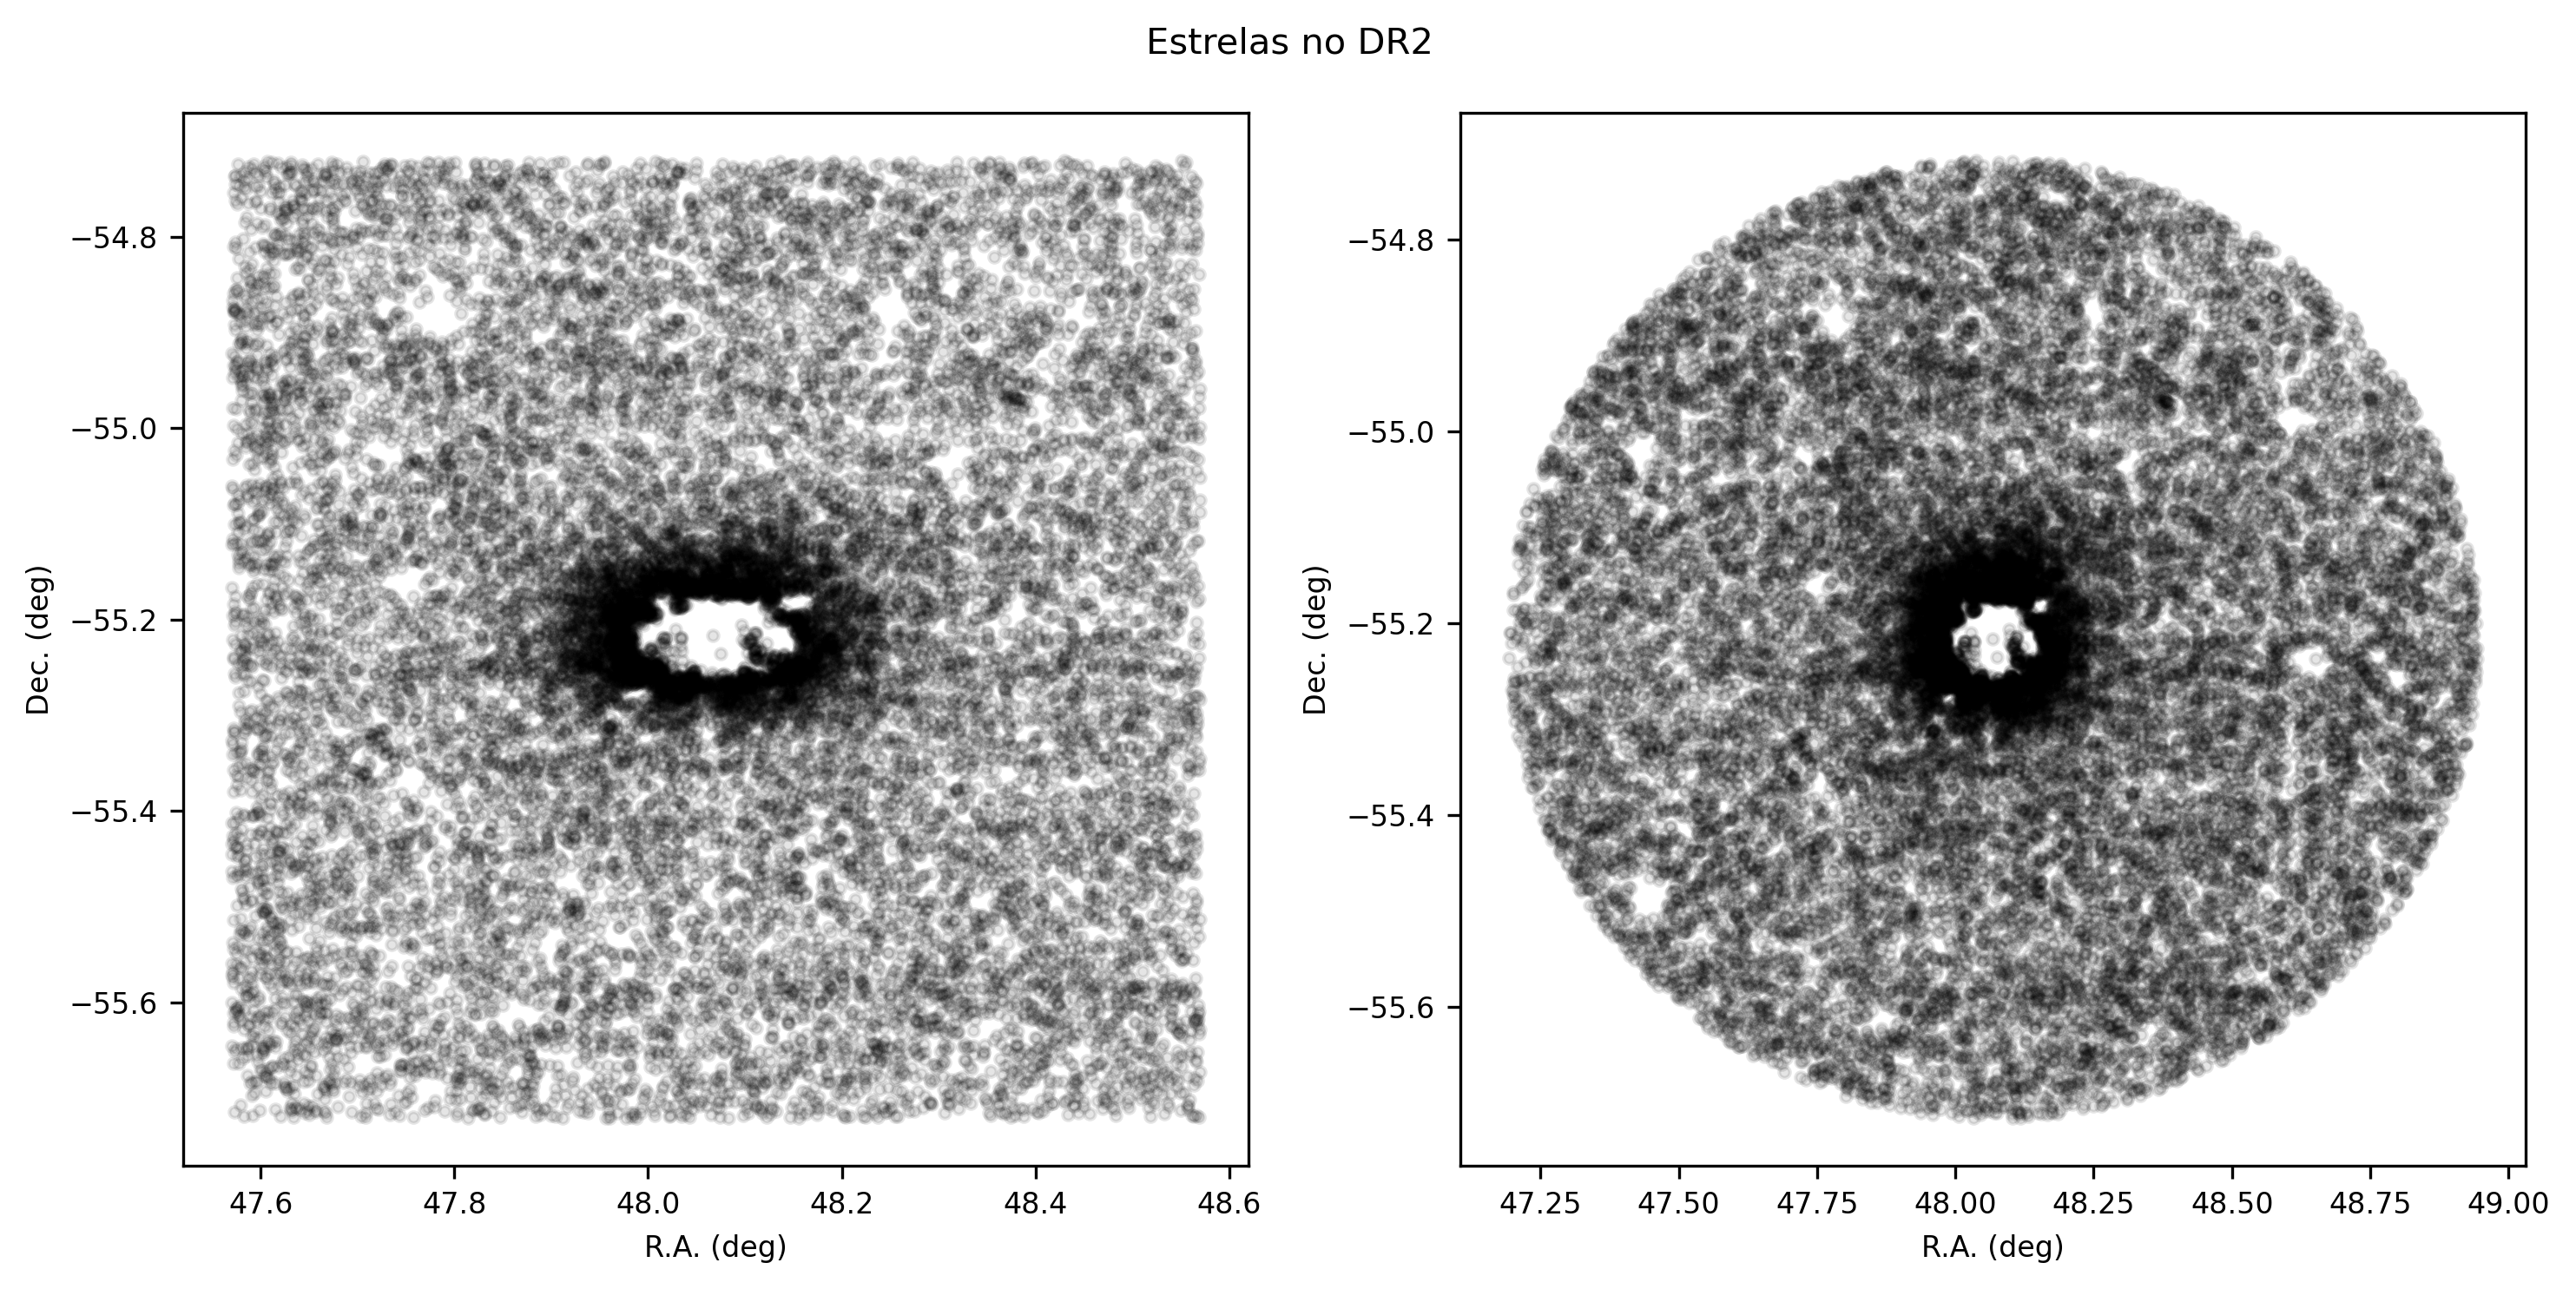

In [36]:
%%time
fontSize = 8
plt.figure(figsize=[10,5], dpi=300)
plt.suptitle("NGC 1261 no DES DR2", fontsize=10)
plt.subplot(1,2,1)
plt.plot(dados_NGC1261_sqr.ra, dados_NGC1261_sqr.dec, 'k.', alpha=0.1)
plt.xlabel("R.A. (deg)", fontsize=fontSize)
plt.ylabel("Dec. (deg)", fontsize=fontSize)
plt.xticks(fontsize=fontSize)
plt.yticks(fontsize=fontSize)
plt.subplot(1,2,2)
plt.plot(dados_NGC1261.ra, dados_NGC1261.dec, 'k.', alpha=0.1)
plt.xlabel("R.A. (deg)", fontsize=fontSize)
plt.ylabel("Dec. (deg)", fontsize=fontSize)
plt.xticks(fontsize=fontSize)
plt.yticks(fontsize=fontSize)
plt.tight_layout()

CPU times: user 392 ms, sys: 154 ms, total: 546 ms
Wall time: 544 ms


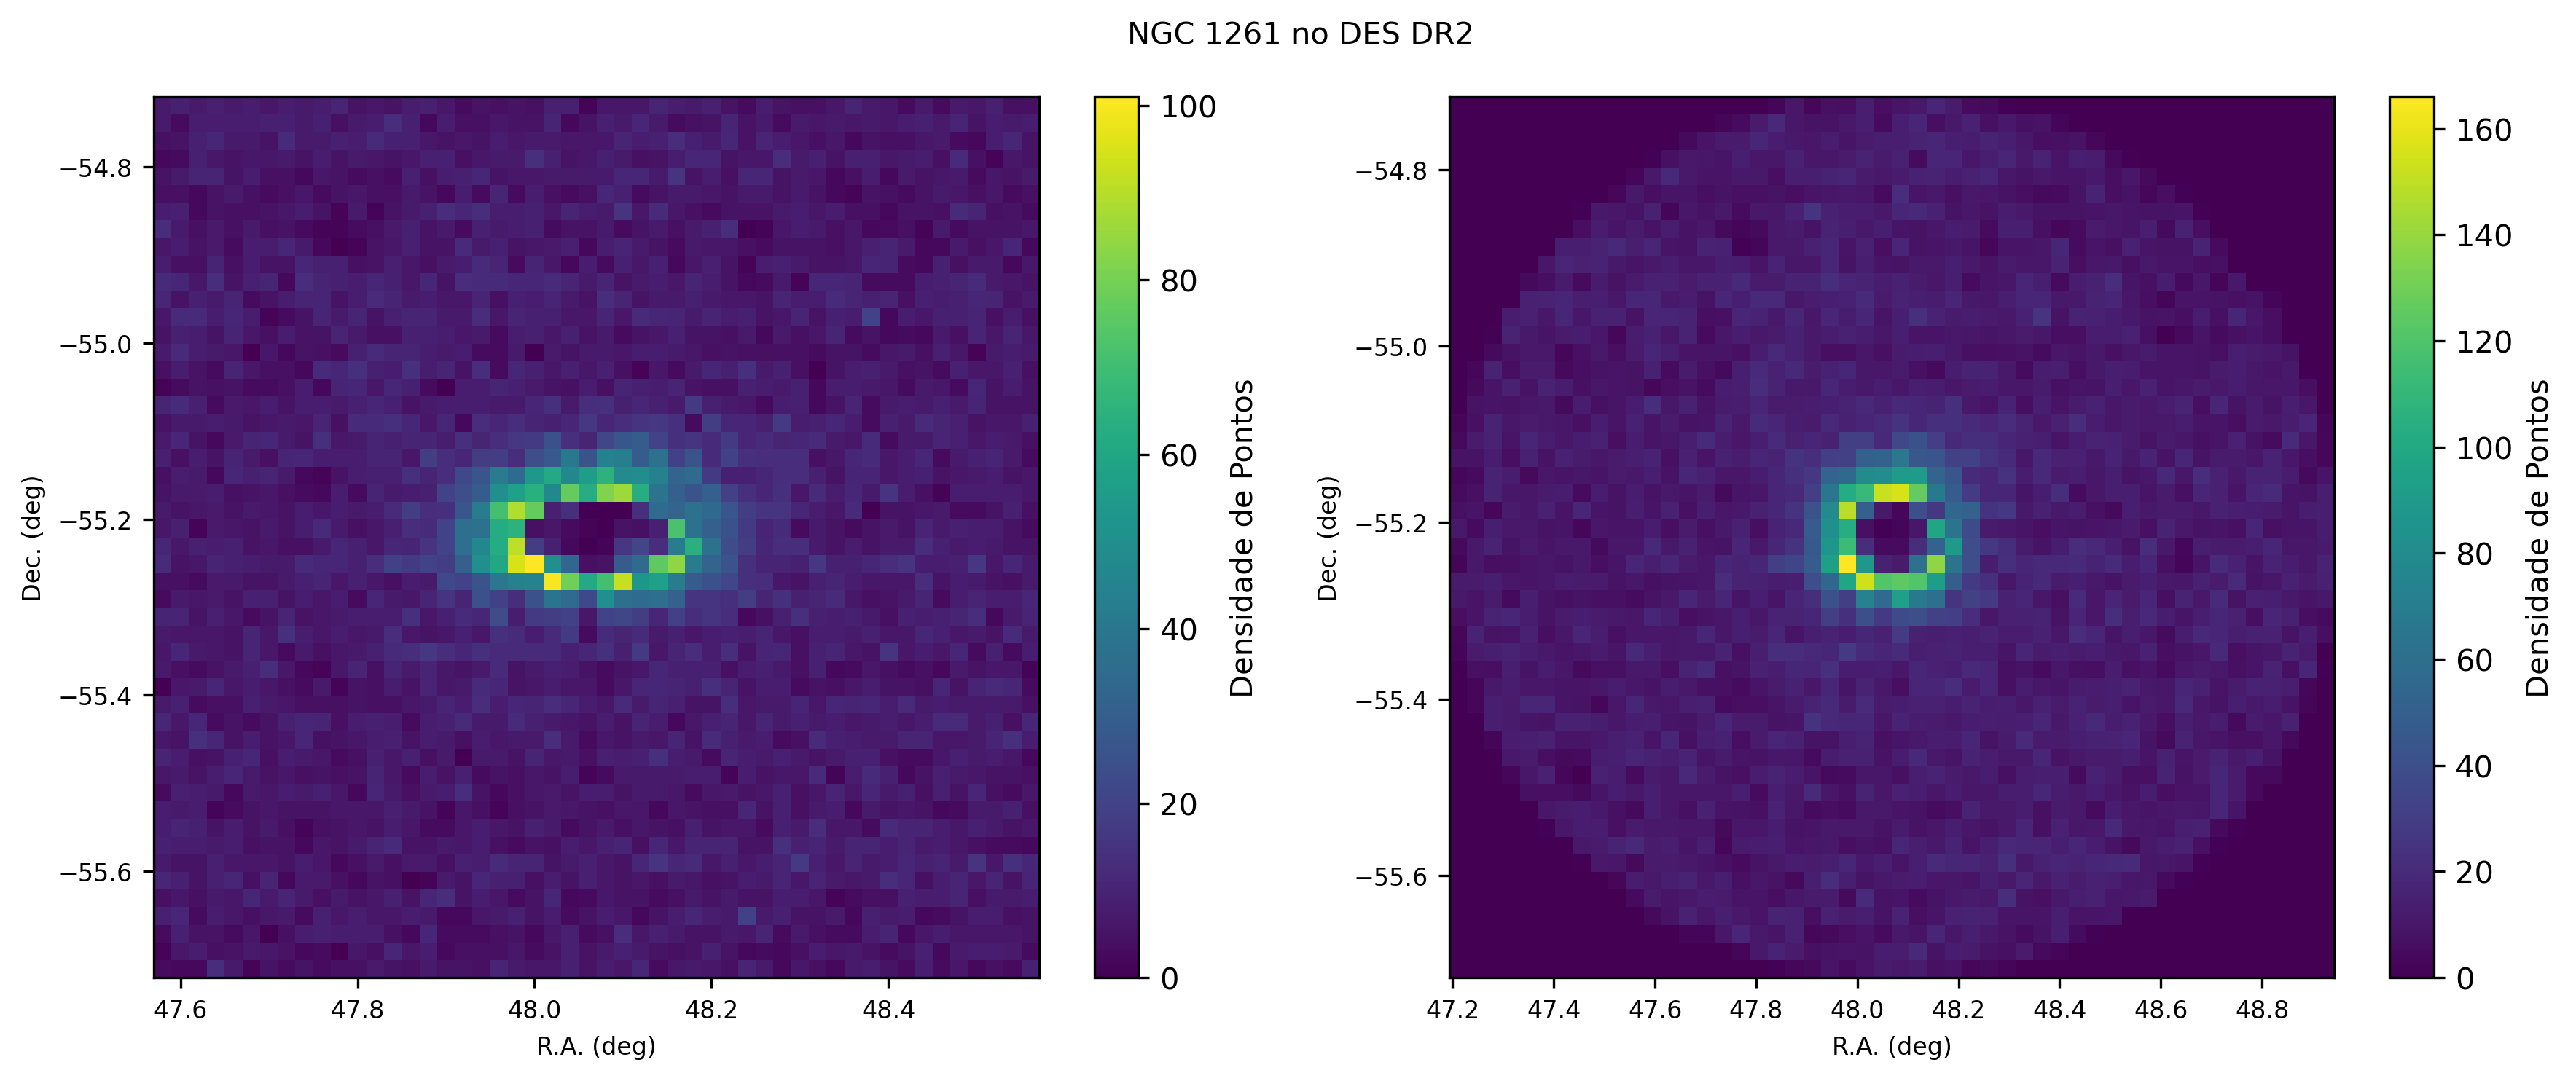

In [40]:
%%time
fontSize = 8
plt.figure(figsize=[12,5], dpi=300)
plt.suptitle("NGC 1261 no DES DR2", fontsize=10)
plt.subplot(1,2,1)
plt.hist2d(dados_NGC1261_sqr.ra, dados_NGC1261_sqr.dec, bins=50)
plt.xlabel("R.A. (deg)", fontsize=fontSize)
plt.ylabel("Dec. (deg)", fontsize=fontSize)
plt.colorbar(label="Densidade de Pontos")
plt.xticks(fontsize=fontSize)
plt.yticks(fontsize=fontSize)
plt.subplot(1,2,2)
plt.hist2d(dados_NGC1261.ra, dados_NGC1261.dec, bins=50)
plt.xlabel("R.A. (deg)", fontsize=fontSize)
plt.ylabel("Dec. (deg)", fontsize=fontSize)
plt.colorbar(label="Densidade de Pontos")
plt.xticks(fontsize=fontSize)
plt.yticks(fontsize=fontSize)
plt.tight_layout()

In [41]:
dados = dados_NGC1261

#deleta dados nao utilizados
del dados_NGC1261
del dados_NGC1261_sqr

#renomeia colunas
new_columns = {"coadd_object_id": "object_id",
               "mag_auto_g_dered": "mag_g",
               "mag_auto_r_dered": "mag_r",
               "mag_auto_i_dered": "mag_i",
               "magerr_auto_g": "err_g", 
               "magerr_auto_r": "err_r", 
               "magerr_auto_i": "err_i"}

dados.rename(columns=new_columns, inplace=True)

In [43]:
# cor = g - r
dados["gmr"] = dados.mag_g - dados.mag_r

In [50]:
dados.query("flags_g < 4  & mag_g != 99. & mag_r != 99. & mag_i != 99. ", inplace=True)
dados.count()
NGC1261_DES = pd.DataFrame(dados)
NGC1261_DES.to_csv('NGC1261_DES.csv')

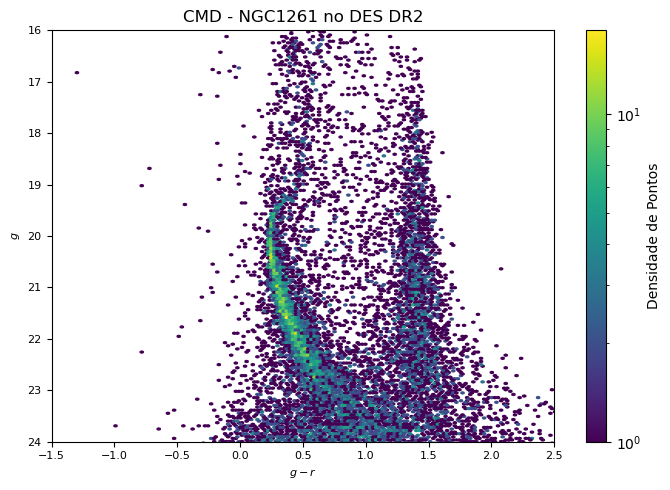

In [46]:
plt.figure(figsize=[7,5])
plt.title("CMD - NGC1261 no DES DR2", fontsize=12)
plt.hexbin(dados.gmr, dados.mag_r, gridsize=500, bins='log') #Essa linha cria um gráfico hexbin usando Matplotlib, 
#que é particularmente útil para visualizar a densidade de pontos de dados em um espaço bidimensional.
plt.xlabel("$g - r$", fontsize=fontSize)
plt.ylabel("$g$", fontsize=fontSize)
plt.colorbar(label="Densidade de Pontos")
plt.xticks(fontsize=fontSize)
plt.yticks(fontsize=fontSize)
plt.xlim(-1.5,2.5)
plt.ylim(24,16)
plt.tight_layout()

In [48]:
NGC1261_DES

',object_id,ra,dec,flags_g,mag_g,mag_r,mag_i,err_g,err_r,err_i,gmr\n0,1375829423,48.453048,-55.661009,0,23.482196807861328,22.085296630859375,20.805164337158203,0.08183915913105011,0.033382900059223175,0.016821393743157387,1.3969001770019531\n1,1375829059,48.480226,-55.655995,2,24.97698402404785,24.254600524902344,24.34425926208496,0.3107924461364746,0.21211840212345123,0.45014292001724243,0.7223834991455078\n2,1375828939,48.485094,-55.654701,0,24.11188316345215,23.398897171020508,23.043949127197266,0.10266034305095673,0.07078370451927185,0.09943408519029617,0.7129859924316406\n3,1375828377,48.478675,-55.649696,0,25.42278480529785,25.11758804321289,25.80680274963379,0.2134302705526352,0.21080245077610016,0.7270321249961853,0.30519676208496094\n4,1375827632,48.516404,-55.642199,0,26.027009963989258,26.60664176940918,25.286420822143555,0.4808390140533447,1.075242042541504,0.5838872194290161,-0.5796318054199219\n5,1375828398,48.49597,-55.649865,0,24.74405860900879,24.735050201416016,24.66